<a href="https://colab.research.google.com/github/rb58853/ML-RSI-Images/blob/main/code/CLIP-Embedding/CLIPEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rb58853/ML-RSI-Images.git
!python3 -m pip install opencv-python matplotlib
!python3 -m pip install 'git+https://github.com/rb58853/segment-anything.git'

Cloning into 'ML-RSI-Images'...
remote: Enumerating objects: 819, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 819 (delta 65), reused 118 (delta 45), pack-reused 660
Receiving objects: 100% (819/819), 23.93 MiB | 2.80 MiB/s, done.
Resolving deltas: 100% (322/322), done.
  Cloning https://github.com/rb58853/segment-anything.git to /tmp/pip-req-build-ms95u4n0
  Running command git clone --filter=blob:none --quiet https://github.com/rb58853/segment-anything.git /tmp/pip-req-build-ms95u4n0
  Resolved https://github.com/rb58853/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=fdd00baffaf8c2c7ccb6e3bac526def0b93bf1d64f352c8c3cf8172d0dc4fc2e
  Stored in directory: /tmp/pip-ephem-wheel-cache-v7dbgam7/wheels/5b/3b/a9/8a4ffebff15c8288d2f9fb53f57947811c48cc909

In [2]:
import os
os.chdir('ML-RSI-Images/code/CLIP-Embedding')
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2023-12-23 17:38:01--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.111, 13.226.210.78, 13.226.210.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   152MB/s    in 18s     

2023-12-23 17:38:19 (134 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [3]:
from clip_embeding import ClipEmbedding
clip = ClipEmbedding()

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [4]:
from clip_embeding import ProcessImages
process = ProcessImages()

PyTorch version: 2.1.0+cu121
Torchvision version: 0.16.0+cu121
CUDA is available: True


In [5]:
import matplotlib.pyplot as plt

def show_image(image):
  plt.figure(figsize=(2,2))
  plt.title(f'image')
  plt.imshow(image)
  plt.axis('off')
  plt.show()

In [6]:
from PIL import Image
image_path = '../../images/'
image = Image.open(image_path+'image_1.jpg')

In [7]:
image = Image.open(image_path+'image_1.jpg')
texts = ['a cat sleeping in a pink couch',
         'pink',
         'a cat sleeping',
         'a cat sleeping in a pink couch with a remote control',
         'a cat sleeping on a couch with a remote control',
         'a brown cat sleeping in a pink couch with a remote control',
         'a brown cat sleeping in a pink couch with a remote control left side',
         'a brown cat sleeping in a pink couch with a remote control left side, a dog, a cat, a sofa, a couch, a man',
         'a brown cat sleeping in a pink couch with a remote control in left side, in right side are another cat sleeping, in center just are a pink couch'
         ]

texts = [f'a photo of {text}' for text in texts]

In [8]:
image = Image.open(image_path+'image_3.jpg')
texts = [
    'a cat and a dog siting in a orange couch, a cat with a smile on its face in the right side, and a dog laying on a pillow in the left side ',
    'a cat and a dog siting in a orange couch, a cat with a smile on its face in the left side, and a dog laying on a pillow in the right side ',
    'a cat and a dog siting in a orange couch, a cat with a smile on its face in the side, and a dog laying on a pillow in the side ',
    'a cat and a dog siting in a orange couch, a cat with a smile on its face in the left, and a dog laying on a pillow in the right ',
    'a cat and a dog siting in a couch, a cat with a smile on its face in the left side, and a dog laying on a pillow in the right side ',
    'a cat and a dog siting in a couch',
    'a cat and a dog siting in a orange couch',
    'green couch',
    'red couch',
    'yellow couch',
    'blue couch',
    'orange couch',
    'blue pillow',
    'orange pillow',
    'yellow pillow',
    'a gray cat siting on a couch with a smile on its face',
    'a gray cat slaying on a couch with a smile on its face',
    'a gray cat slaying on a orange couch with a smile on its face',
    'a gray cat slaying with a smile on its face',
    'a gray cat with a smile on its face',
    'a gray dog with a smile on its face',
  ]

texts = [f'a photo of {text}' for text in texts]

In [9]:
subembeddings = process.get_embedding_segmentations(image_path= image_path+'image_3.jpg',segmentation= 'box')

In [10]:
# seg_image = process.segmentations[10]
# image_embedding = (clip.get_image_embedding(seg_image)[0], None)
image_embedding = (clip.get_image_embedding(image)[0], None)
text_embedding = clip.get_text_vector(texts)
# print(text_embedding[0][1])
print(image_embedding[1])

None


In [11]:
# show_image(seg_image)

for text_emb, text in zip(text_embedding, texts):
    print(clip.calculate_similarity(image_embedding, text_emb), end = ": ")
    # print(clip.calculate_similarity(subembeddings[10], text_emb) * 1.1, end = ": ")
    print(text)

0.3471260070800781: a photo of a cat and a dog siting in a orange couch, a cat with a smile on its face in the right side, and a dog laying on a pillow in the left side 
0.35005104541778564: a photo of a cat and a dog siting in a orange couch, a cat with a smile on its face in the left side, and a dog laying on a pillow in the right side 
0.3530585765838623: a photo of a cat and a dog siting in a orange couch, a cat with a smile on its face in the side, and a dog laying on a pillow in the side 
0.3524287939071655: a photo of a cat and a dog siting in a orange couch, a cat with a smile on its face in the left, and a dog laying on a pillow in the right 
0.35564717650413513: a photo of a cat and a dog siting in a couch, a cat with a smile on its face in the left side, and a dog laying on a pillow in the right side 
0.32339298725128174: a photo of a cat and a dog siting in a couch
0.3132731020450592: a photo of a cat and a dog siting in a orange couch
0.2501467168331146: a photo of green c

In [12]:
process.ranking(image_path+'image_3.jpg', 'box')

index_9: 0.9397554397583008
index_3: 0.8568882942199707
index_8: 0.8493101000785828
index_10: 0.8216457366943359
index_6: 0.6960503458976746
index_5: 0.6657192707061768
index_1: 0.6454052329063416
index_7: 0.6250130534172058
index_4: 0.6057426929473877
index_0: 0.6049538850784302
index_2: 0.5673375725746155


{0.9397554397583008: (tensor([-1.7406e-01,  1.4014e-01, -3.5967e-01,  8.8432e-02,  7.6491e-02,
          -1.9893e-01, -2.9545e-01, -1.9845e-02,  4.9221e-01, -8.2864e-02,
           2.3147e-01, -7.4924e-02,  1.7401e-02, -1.3277e-01, -3.5333e-01,
          -4.8276e-02, -2.7355e-01,  1.0607e-01,  7.3330e-02,  7.1267e-02,
          -1.2138e+00, -3.1216e-01,  3.2658e-01, -1.8300e-01,  2.3628e-02,
           3.1970e-01,  2.9031e-02,  5.5464e-02,  6.0161e-02, -1.1797e-01,
          -2.8427e-01,  2.0798e-01, -1.0935e-01, -3.5083e-02, -2.0639e-01,
           3.5313e-02,  2.3966e-01, -4.8048e-01,  1.8737e-03,  4.3120e-01,
          -1.7440e-01, -4.0415e-01, -4.0945e-01, -2.0353e-01, -2.0551e-01,
          -5.0965e-01,  5.0570e-01,  5.2670e-02, -1.5605e-01, -1.6232e-01,
          -5.3055e-02,  1.8398e-01,  1.7340e-01,  2.3081e-01,  6.3739e-03,
           5.0421e-01,  3.0611e-01,  4.2207e-01, -2.6166e-01, -4.0361e-02,
           6.3606e-01, -2.6972e-01, -1.7435e-01,  3.3820e-01, -1.6029e-01,
     

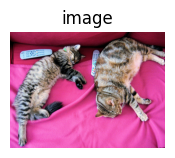

In [13]:
image = Image.open(image_path+'image_3.jpg')
show_image(image)

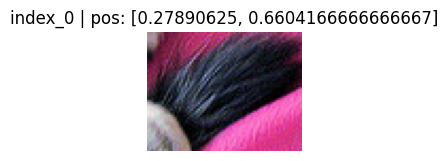

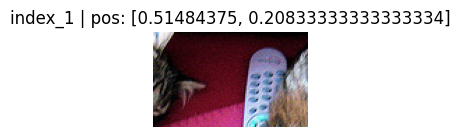

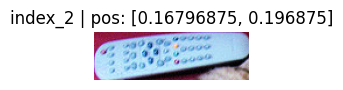

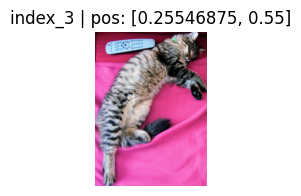

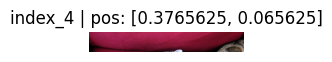

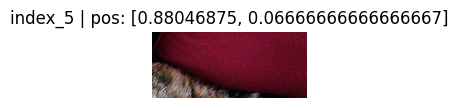

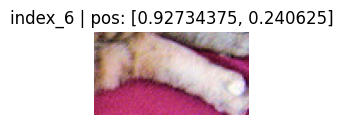

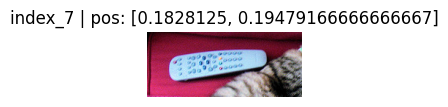

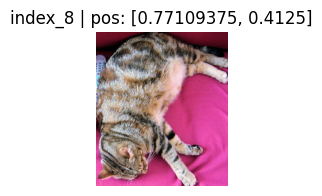

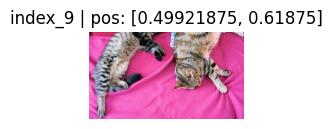

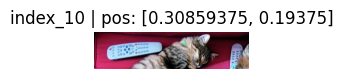

In [14]:
process.show_images()